In [144]:
import pathlib
import os 
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import xml.etree.ElementTree as ET

import torch 
import torchvision.transforms.functional as F
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes

In [145]:
def rename_files(folder_path: str, file_type: str) -> None:
    if file_type == "jpg":
        img_list = ([str(path) for path in folder_path.glob('*.jpg')])
        for i, img_file in enumerate(img_list):
            old_img_file = os.path.join(img_file)
            new_img_file = old_img_file[:72] + str("0" + old_img_file.split('/')[6].split('-')[1].split('.')[0])[-4:]+ ".jpg"
            os.rename(old_img_file, new_img_file)
    elif file_type == "xml":
        img_list = ([str(path) for path in folder_path.glob('*.xml')])
        for i, img_file in enumerate(img_list):
            old_xml_file = os.path.join(img_file)
            new_xml_file = old_img_file[:72] + str("0" + old_img_file.split('/')[6].split('-')[1].split('.')[0])[-4:]+ ".xml"
            os.rename(old_xml_file, new_xml_file)

In [146]:
def get_meta_data(xml_file: str) -> list:
    with open(xml_file, 'r', encoding="utf-8") as content:
        tree = ET.parse(content)
        root = tree.getroot()
        element = 6
        img_meta_data = []

        while True:
            try:
                if len(list(root[element])) > 0:
                    label = root[element][0].text
                    xmin = int(root[element][4][0].text)
                    ymin = int(root[element][4][1].text)
                    xmax = int(root[element][4][2].text)
                    ymax = int(root[element][4][3].text)
                    item = [label, xmin, ymin, xmax, ymax]
                    img_meta_data.append(item)
                    element += 1
            except IndexError as err:
                break

    return img_meta_data

In [147]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [158]:
def plot_image(image_file: str, xml_file: str, classes: dict) -> None:
    img_meta_data = get_meta_data(xml_file)
    parse_classes = []
    parse_boxes = []

    img = read_image(image_file)
    for meta_data in img_meta_data:
        entity = classes[meta_data[0]]
        meta_data[0] = entity 
        parse_classes.append(meta_data[0])
        parse_boxes.append(meta_data[1:5])

    boxes = torch.tensor(parse_boxes, dtype=torch.float)

    colors = []
    for entity_class in parse_classes:
        if entity_class == 1:
            colors.append("blue")
        elif entity_class == 2:
            colors.append("red")

    result = draw_bounding_boxes(img, boxes, colors=colors, width=10)
    show(result)

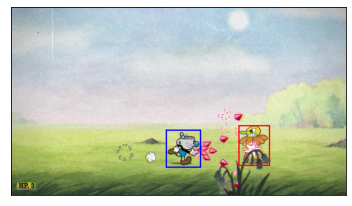

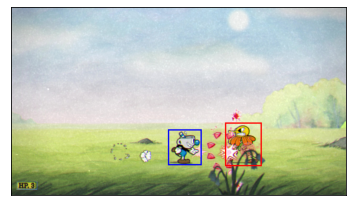

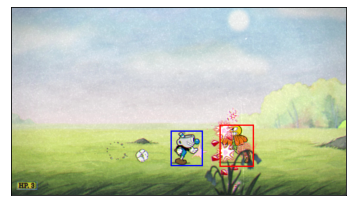

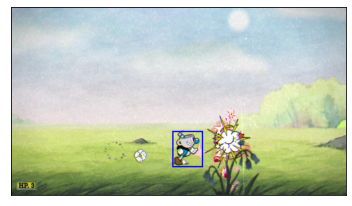

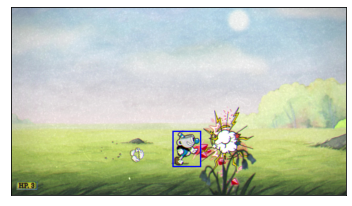

In [165]:
classes = {"mugman": 1, "deadly_daisy": 2}
imgdir_path = pathlib.Path('/Users/volker/Documents/cuphead_deep_learning/ch_forest_follies_1')
image_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
xml_list = sorted([str(path) for path in imgdir_path.glob('*.xml')])

i = 1
asd = []
for image_file, xml_file in zip(image_list, xml_list):
    if i >= 68 and i <= 72:
        plot_image(image_file, xml_file, classes)

    i += 1